# YouTube Spam Collection v. 1

## Grupo 2
Alberto Atilio Sbrana Junior
<br>
Luiz Barreto Pedro de Alcântara
<br>
Priscila Portela Costa

# Problema

Trata-se de um problema de classificação binária sobre comentários de vídeos no Youtube.
<br>
Há no total 5 arquivos, separados por artista:
- Psy
- Katy Perry
- LMFAO
- Eminem
- Shakira

# Bibliotecas

In [1]:
import pandas as pd #manipulação de dataframes
import numpy as np #manipulacao matricial
import seaborn as sns #visualização
import matplotlib.pyplot as plt #visualização

# importa algumas biblioteca para plotar dados em 3D        
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle
from pylab import *

import scipy.optimize  #otimizacao de parametros

import ML_library #biblioteca criada pelo grupo 2

# Dados

Primeiro, vamos carregar cada um dos arquivos em um _dataframe_

In [2]:
df_psy = pd.read_csv('Youtube 01-comments Psy.csv')
df_kat = pd.read_csv('Youtube 04-comments KatyPerry.csv')
df_lma = pd.read_csv('Youtube 07-comments LMFAO.csv')
df_emi = pd.read_csv('Youtube 08-comments Eminem.csv')
df_sha = pd.read_csv('Youtube 09-comments Shakira.csv')

Podemos agora ver as 5 linhas de cada dataframe e a estrutura de dados esperada:

In [3]:
df_list = [df_psy, df_kat, df_lma, df_emi, df_sha]

for df in df_list:
    display(df.head(n=5))

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12pgdhovmrktzm3i23es5d5junftft3f,lekanaVEVO1,2014-07-22T15:27:50,i love this so much. AND also I Generate Free ...,1
1,z13yx345uxepetggz04ci5rjcxeohzlrtf4,Pyunghee,2014-07-27T01:57:16,http://www.billboard.com/articles/columns/pop-...,1
2,z12lsjvi3wa5x1vwh04cibeaqnzrevxajw00k,Erica Ross,2014-07-27T02:51:43,Hey guys! Please join me in my fight to help a...,1
3,z13jcjuovxbwfr0ge04cev2ipsjdfdurwck,Aviel Haimov,2014-08-01T12:27:48,http://psnboss.com/?ref=2tGgp3pV6L this is the...,1
4,z13qybua2yfydzxzj04cgfpqdt2syfx53ms0k,John Bello,2014-08-01T21:04:03,Hey everyone. Watch this trailer!!!!!!!! http...,1


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k,Corey Wilson,2015-05-28T21:39:52.376000,"<a href=""http://www.youtube.com/watch?v=KQ6zr6...",0
1,z124jvczaz3dxhnbc04cffk43oiugj25yzo0k,Epic Gaming,2015-05-28T20:07:20.610000,wierd but funny﻿,0
2,z13tczjy5xj0vjmu5231unho1ofey5zdk,LaS Music,2015-05-28T19:23:35.355000,"Hey guys, I&#39;m a human.<br /><br /><br />Bu...",1
3,z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k,Cheryl Fox,2015-05-28T17:49:35.294000,Party Rock....lol...who wants to shuffle!!!﻿,0
4,z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k,PATRICK_TW,2015-05-28T16:28:26.818000,Party rock﻿,0


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


Podemos ver que todos os 5 datasets possuem as mesmas colunas:
- COMMENT_ID: Possivelmente um _hash_ único para cada comentário, deve ser verificado
- AUTHOR: Nome do autor
- DATE: data do comentário (não sabemos exatamento em que )
- CONTENT: Texto do comentário
- CLASS: spam (1) ou não spam (0)

# Análise exploratória

Por se tratarem de datasets pequenos, podemos analisar todo o conteúdo dos 5 conjunto de dados fornecidos.

In [4]:
df_dict = {'PSY': df_psy,
           'Katy Perry': df_kat,
           'LMFAO': df_lma,
           'Eminem': df_emi,
           'Shakira': df_sha}

Vamos verificar se a coluna alvo possui quantidades balanceadas em cada _dataset_

In [5]:
for name, df in df_dict.items():
    print('Dataset: {}'.format(name))
    print(df.groupby(['CLASS']).size())
    print('---')

Dataset: PSY
CLASS
0    175
1    175
dtype: int64
---
Dataset: Katy Perry
CLASS
0    175
1    175
dtype: int64
---
Dataset: LMFAO
CLASS
0    202
1    236
dtype: int64
---
Dataset: Eminem
CLASS
0    203
1    245
dtype: int64
---
Dataset: Shakira
CLASS
0    196
1    174
dtype: int64
---


Podemos verificar que os valores da coluna alvo estão devidamente balanceados.

In [6]:
for name, df in df_dict.items():
    print('Número de linhas em {}: {}'.format(name, len(df)))
    print('Número de COMMENT_ID únicos em {}: {}'.format(name, len(df['COMMENT_ID'].unique())))
    print('---')

Número de linhas em PSY: 350
Número de COMMENT_ID únicos em PSY: 350
---
Número de linhas em Katy Perry: 350
Número de COMMENT_ID únicos em Katy Perry: 350
---
Número de linhas em LMFAO: 438
Número de COMMENT_ID únicos em LMFAO: 438
---
Número de linhas em Eminem: 448
Número de COMMENT_ID únicos em Eminem: 446
---
Número de linhas em Shakira: 370
Número de COMMENT_ID únicos em Shakira: 369
---


Nos _datasets_ de PSY, Katy Perry e LMFAO, aparentemente a coluna COMMENT_ID é utilizada como identificador único.
<br>
Devemos verificar se há duplicados nos _datasets_ de Eminem e Shakira.

In [7]:
for name, df in df_dict.items():
    df_duplicates = df[df.duplicated(keep=False)]
    print('Linhas duplicadas em {}: {}'.format(name, len(df_duplicates)))

Linhas duplicadas em PSY: 0
Linhas duplicadas em Katy Perry: 0
Linhas duplicadas em LMFAO: 0
Linhas duplicadas em Eminem: 4
Linhas duplicadas em Shakira: 2


Como há entradas duplicadas em nos _datasets_ associados aos vídeos de Eminem e Shakira, devemos removê-las.

In [8]:
for name, df in df_dict.items():
    df.drop_duplicates(subset=None, keep='first', inplace=True)

In [9]:
for name, df in df_dict.items():
    print('Número de linhas em {}: {}'.format(name, len(df)))
    print('Número de COMMENT_ID únicos em {}: {}'.format(name, len(df['COMMENT_ID'].unique())))
    print('---')

Número de linhas em PSY: 350
Número de COMMENT_ID únicos em PSY: 350
---
Número de linhas em Katy Perry: 350
Número de COMMENT_ID únicos em Katy Perry: 350
---
Número de linhas em LMFAO: 438
Número de COMMENT_ID únicos em LMFAO: 438
---
Número de linhas em Eminem: 446
Número de COMMENT_ID únicos em Eminem: 446
---
Número de linhas em Shakira: 369
Número de COMMENT_ID únicos em Shakira: 369
---


Conforme esperado, a coluna COMMENT_ID é um identificador único para cada linha. 
<br>
Não há ganho de informação com essa coluna, então podemos apagá-la.

In [10]:
for name, df in df_dict.items():
    df.drop('COMMENT_ID', axis=1, inplace=True)

Agora temos 3 colunas, que podem ser úteis na classificação da coluna alvo (CLASS):
- AUTOR
- DATE
- CONTENT

Após a remoção da coluna COMMENT_ID, devemos agora ver quais se há entradas repetidas.

In [11]:
for name, df in df_dict.items():
    df_duplicates = df[df.duplicated(keep=False)]
    print('Linhas duplicadas em {}: {}'.format(name, len(df_duplicates)))

Linhas duplicadas em PSY: 0
Linhas duplicadas em Katy Perry: 0
Linhas duplicadas em LMFAO: 0
Linhas duplicadas em Eminem: 19
Linhas duplicadas em Shakira: 0


Devemos remover os duplicados no dataset do _Eminem_.

In [12]:
df_emi.drop_duplicates(subset=None, keep='first', inplace=True)

Devemos tambem verificar se há entradas inconsistentes.

In [13]:
for name, df in df_dict.items():
    print('Dataset: {}'.format(name))
    df_duplicates = df[df.duplicated(subset=['AUTHOR', 'DATE', 'CONTENT'],keep=False)] 
    # se tiver valores inconsistentes, imprime 
    if len(df_duplicates)>0:
        print('\nAmostras inconsistentes:')
        display(df_duplicates)
    else:
        print('Não existem mostras inconsistentes')

Dataset: PSY
Não existem mostras inconsistentes
Dataset: Katy Perry
Não existem mostras inconsistentes
Dataset: LMFAO
Não existem mostras inconsistentes
Dataset: Eminem
Não existem mostras inconsistentes
Dataset: Shakira
Não existem mostras inconsistentes


Vamos verificar se há valores nulos nas colunas em cada _dataset_:

In [14]:
for name, df in df_dict.items():
    print('Dataset: {}'.format(name))
    print('Tamanho do dataset: {}'.format(len(df)))
    print(df.isnull().sum(axis = 0))
    print('---')

Dataset: PSY
Tamanho do dataset: 350
AUTHOR     0
DATE       0
CONTENT    0
CLASS      0
dtype: int64
---
Dataset: Katy Perry
Tamanho do dataset: 350
AUTHOR     0
DATE       0
CONTENT    0
CLASS      0
dtype: int64
---
Dataset: LMFAO
Tamanho do dataset: 438
AUTHOR     0
DATE       0
CONTENT    0
CLASS      0
dtype: int64
---
Dataset: Eminem
Tamanho do dataset: 433
AUTHOR       0
DATE       230
CONTENT      0
CLASS        0
dtype: int64
---
Dataset: Shakira
Tamanho do dataset: 369
AUTHOR     0
DATE       0
CONTENT    0
CLASS      0
dtype: int64
---


Para o _dataset_ de Eminem, um pouco mais da metade dos registros pussui uma data associada.

De início, vamos inserir o valor esdrúxulo para os datetimes nulos no dataset do Eminem.

In [15]:
df_emi['DATE'].fillna(-999, inplace=True)

Vamos verificar se há mais de um comentário por usuário ou comentários parecidos.

In [16]:
for name, df in df_dict.items():
    print('Dataset: {}'.format(name))
    print('Tamanho do dataset: {}'.format(len(df)))
    print(df.T.apply(lambda x: x.nunique(), axis=1))
    print('---')

Dataset: PSY
Tamanho do dataset: 350
AUTHOR     345
DATE       350
CONTENT    349
CLASS        2
dtype: int64
---
Dataset: Katy Perry
Tamanho do dataset: 350
AUTHOR     342
DATE       350
CONTENT    348
CLASS        2
dtype: int64
---
Dataset: LMFAO
Tamanho do dataset: 438
AUTHOR     420
DATE       438
CONTENT    340
CLASS        2
dtype: int64
---
Dataset: Eminem
Tamanho do dataset: 433
AUTHOR     392
DATE       204
CONTENT    412
CLASS        2
dtype: int64
---
Dataset: Shakira
Tamanho do dataset: 369
AUTHOR     319
DATE       369
CONTENT    331
CLASS        2
dtype: int64
---


Para todos os datasets, há comentários iguais e mais de um comentário de um mesmo autor.

Vamos analisar agora o conteúdo de data _dataset_ nas colunas texto: AUTHOR e CONTENT

In [17]:
for name, df in df_dict.items():
    print('Dataset: {}'.format(name))
    print(df['AUTHOR'])
    print(df['CONTENT'])
    print('---')

Dataset: PSY
0                                 Julius NM
1                               adam riyati
2                          Evgeny Murashkin
3                           ElNino Melendez
4                                    GsMega
5                              Jason Haddad
6                            ferleck ferles
7                              Bob Kanowski
8                                      Cony
9                               BeBe Burkey
10                                Huckyduck
11                              Lone Twistt
12                             Archie Lewis
13                          TheUploadaddict
14                           Francisco Nora
15                     Gaming and Stuff PRO
16                              Zielimeek21
17                           OutrightIgnite
18                           Tony K Frazier
19                            Jose Renteria
20                             zhichao wang
21                          Carlos Thegamer
22                 

Podemos verificar que há caracteres especiais e letras com acento.

Devemos verificar tambem se há um balanceamento entre as classes que buscamos em cada _dataset_.

In [18]:
for name, df in df_dict.items():
    print('Dataset: {}'.format(name))
    print(df.groupby(['CLASS']).size())
    print('---')

Dataset: PSY
CLASS
0    175
1    175
dtype: int64
---
Dataset: Katy Perry
CLASS
0    175
1    175
dtype: int64
---
Dataset: LMFAO
CLASS
0    202
1    236
dtype: int64
---
Dataset: Eminem
CLASS
0    203
1    230
dtype: int64
---
Dataset: Shakira
CLASS
0    195
1    174
dtype: int64
---


Verificamos que, para cada _dataset_, a distribuição de valores na coluna alvo (CLASS) é igual ou semelhante.

Uma vez que o Youtube é um portal acessado pelo mundo todo e, como o tamanho do dataset nos permite, 
podemos inspecionar visualmente os comentários em busca de saber em quais idiomas eles estão sendo escritos.

In [19]:
for name, df in df_dict.items():
    print('Dataset: {}'.format(name))
    print(df['CONTENT'].unique())
    print('---')

Dataset: PSY
['Huh, anyway check out this you[tube] channel: kobyoshi02'
 "Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!"
 'just for test I have to say murdev.com'
 'me shaking my sexy ass on my channel enjoy ^_^ \ufeff'
 'watch?v=vtaRGgvGtWQ   Check this out .\ufeff'
 'Hey, check out my new website!! This site is about kids stuff. kidsmediausa  . com'
 'Subscribe to my channel \ufeff'
 'i turned it on mute as soon is i came on i just wanted to check the  views...\ufeff'
 'You should check my channel for Funny VIDEOS!!\ufeff'
 'and u should.d check my channel and tell me what I should do next!\ufeff'
 'Hey subscribe to me\ufeff'
 " Once you have started reading do not stop. If you do not subscribe to me  within one day you and you're entire family will die so if you want to stay  alive subscribe right now.\ufeff"
 'https://twitter.com/GBphotographyGB\ufeff'
 'subscri

Para o dataset do PSY, verificamos que a maioria dos comentário são em inglês e há alguns caracteres em coreano.
<br>
Para o dataset de Katy Perry, verificamos que todos os comentário são em inglês.
<br>
Para o dataset de LMFAO, verificamos que a maioria dos comentário são em inglês, com algumas palavras em espanhol.
<br>
Para o dataset de Eminem, verificamos maioria dos comentário são em inglês.
<br>
Para o dataset de Shakira, verificamos que a maioria dos comentário é em inglês e alguns comentários em espanhol.
<br>
<br>
Também não devemos ignorar a quantidade de links nos comentários, que deve set um forte inficador de SPAM.

Vamos estudar a distribuição de SPAM ou HAM de acordo com o ano e hora. 
<br>
De início, vamos considerar que a coluna data está convertida para um único fuso.

In [20]:
#criação de novas colunas: ano, data e has_date (booleana, para o caso do dataset do eminem)
for name, df in df_dict.items():
    df['DATE'] = pd.to_datetime(df['DATE'],infer_datetime_format=True)
    df['comment_year'] = df['DATE'].dt.year
    df['comment_hour'] = df['DATE'].dt.hour
    df['has_date'] = np.where(df['comment_year'] == 1969, False, True)

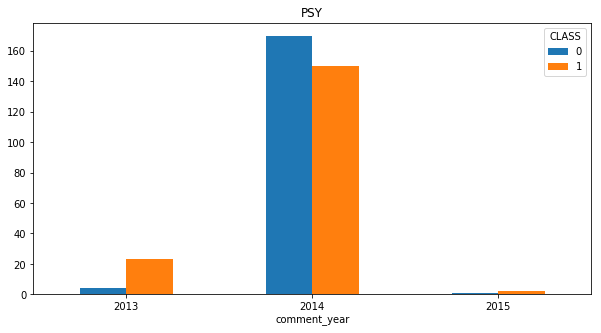

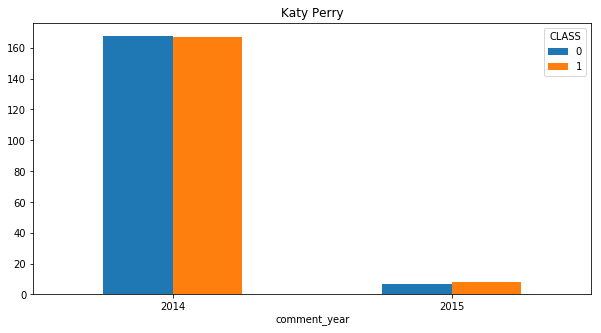

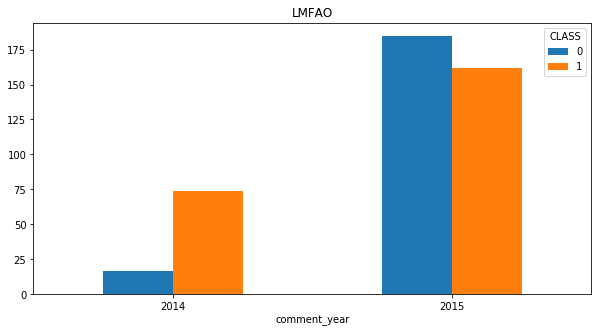

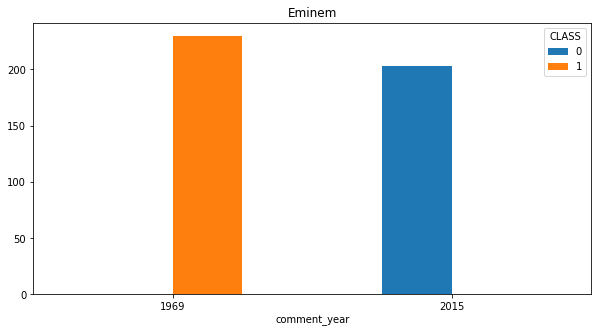

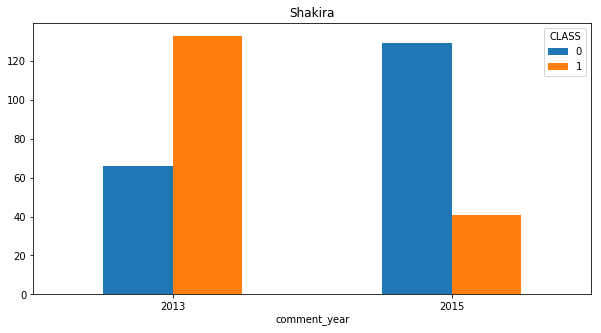

In [21]:
for name, df in df_dict.items():
    df_groupby = df.groupby(['comment_year', 'CLASS']).size().reset_index(name='counts')
    pivot = pd.pivot_table(df_groupby, values='counts', index=['comment_year'], columns=['CLASS'], aggfunc=np.sum)
    pivot.plot.bar(rot=0, title=name, figsize=(10,5))

A divisão por ano parece ter alguma influência no conteúdo da mensagem.
<br>
O mais interessante parece ser que os comentários sem registro de data no _dataset_ (inserimos o valor esdrúxulo de 1969) do eminem são todos SPAM.

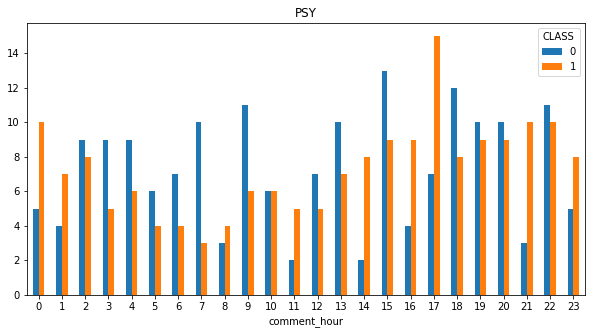

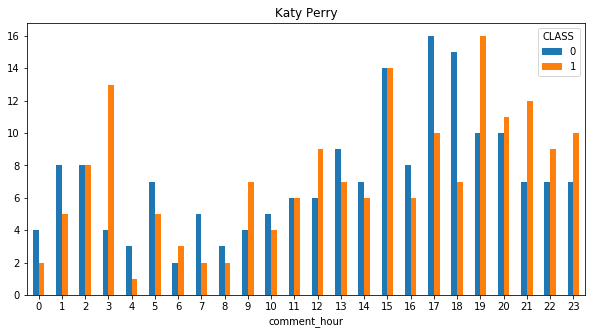

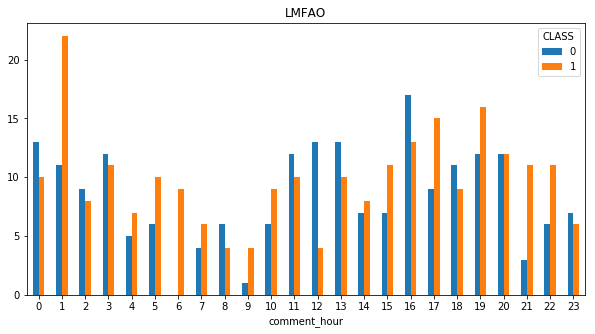

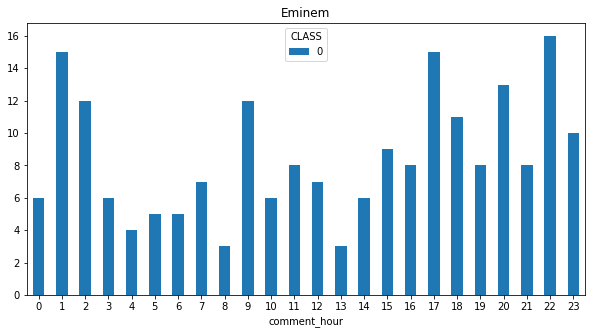

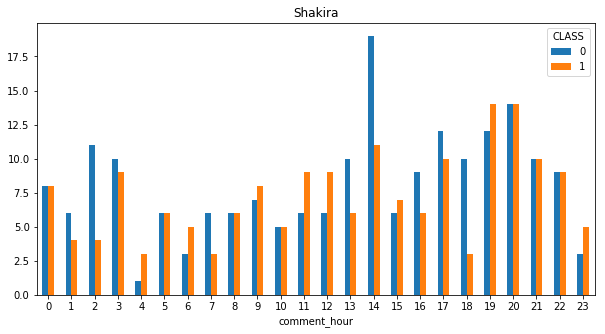

In [22]:
for name, df in df_dict.items():
    df_groupby = df[df['has_date'] == True].groupby(['comment_hour', 'CLASS']).size().reset_index(name='counts')
    pivot = pd.pivot_table(df_groupby, values='counts', index=['comment_hour'], columns=['CLASS'], aggfunc=np.sum)
    pivot.plot.bar(rot=0, title=name, figsize=(10,5))

O horário tambem parece ter alguma influência nas classificações de SPAM e HAM.

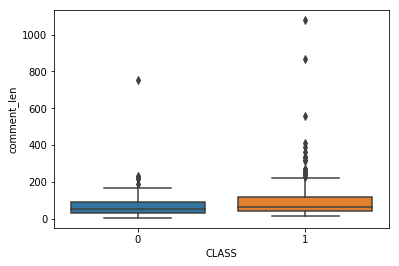

In [23]:
df_psy['comment_len'] = df_psy['CONTENT'].str.len()
ax1 = sns.boxplot(x='CLASS', y='comment_len', data=df_psy)

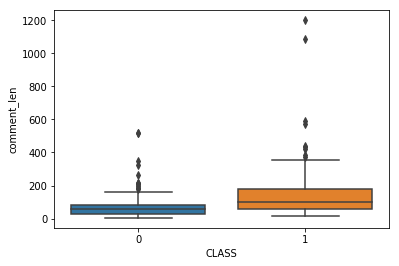

In [24]:
df_kat['comment_len'] = df_kat['CONTENT'].str.len()
ax2 = sns.boxplot(x='CLASS', y='comment_len', data=df_kat)

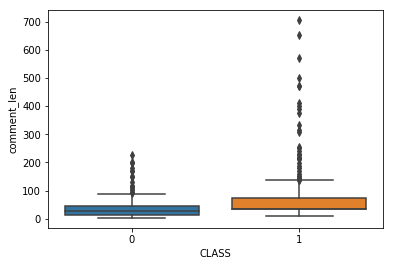

In [25]:
df_lma['comment_len'] = df_lma['CONTENT'].str.len()
ax2 = sns.boxplot(x='CLASS', y='comment_len', data=df_lma)

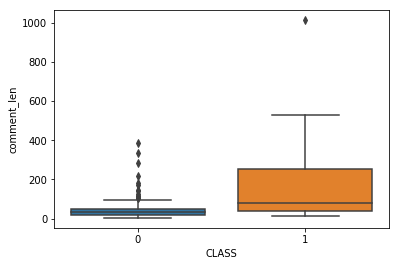

In [26]:
df_emi['comment_len'] = df_emi['CONTENT'].str.len()
ax2 = sns.boxplot(x='CLASS', y='comment_len', data=df_emi)

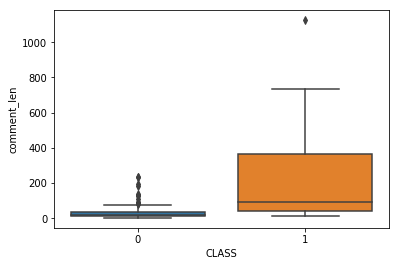

In [27]:
df_sha['comment_len'] = df_sha['CONTENT'].str.len()
ax2 = sns.boxplot(x='CLASS', y='comment_len', data=df_sha)

O tamanho do texto do comentário é um indicativo de SPAM para alguns dos _datasets_, principalmente o de Shakira e Eminem. 